## Generating MIDI from Single Sequence Numeric Data


##

### Import and install required libraries by running the 2 cell below

In [1]:
!pip install midiutil

     ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
     ------------------------------- -------- 0.8/1.0 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for midiutil: filename=midiutil-1.2.1-py3-none-any.whl size=55618 sha256=823e8ab49cb8c1e76bb5157dee1c16438f9eb00d16f90614d90d3364326103b2
  Stored in directory: c:\users\cecil\appdata\local\pip\cache\wheels\52\c2\30\ce4f23db030a863977bc328651b914261581717167aabfcd47
Successfully built midiutil



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\cecil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# This file contains all the definitions for the widgets and some constant variables that I had set 
from music_def import *

In [14]:
# First choice with regards to music
# Run this cell to get the widgets to show 
display(vert_scale)

## Choose a name for your MIDI track
display(vert_name)

### Loading your data 

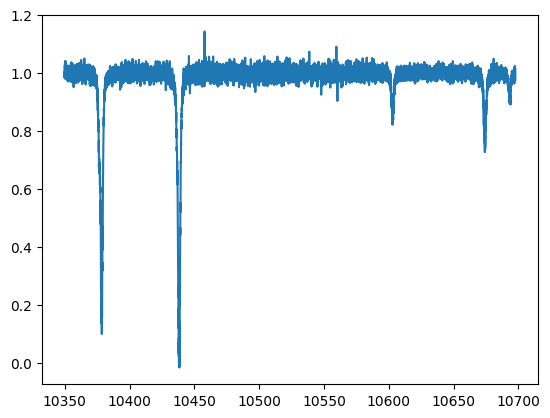

In [3]:
# For now we can take the noisy C60 spec as the guinea pig again 
# This part will differ depending on your data 

# Loading file called "C60plus.csv" and saving the values in the first column as a list called "data " 

file = np.loadtxt('C60plus.csv',skiprows=1, delimiter=',')
# Change the value to change the column you want to look at 
data = file[:,1]

# First look at the data by plotting the first column against the second 
plt.plot(file[:,0],file[:,1])

#### Do you want to take a closer look at the noise?
#### If so, then unhash the 2nd and 3rd line below to manually change the range 

You have manually defined the lower Y bound
You have manually defined the upper Y bound

 Data to bin will look like this:


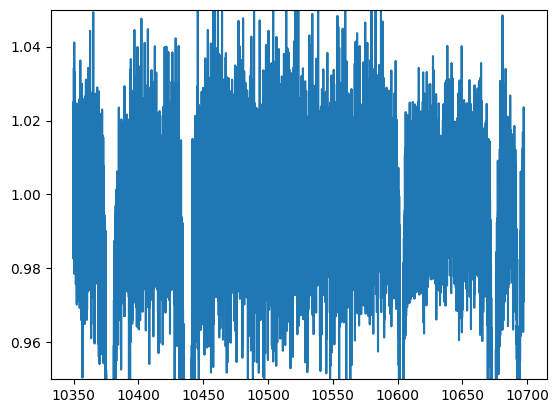

If this is not what you want then you must edit the range and run the cell above again!


In [20]:
# If so then change the maximum and minimum limit of the y-axis
low = 0.95
high = 1.05

# If nothing is included above then it will automatically take the max and min of the data as the range 
try:
    low
except NameError:
    print("Automatically setting min of y as the lower bound")
    low = np.min(data)
else:
    print("You have manually defined the lower Y bound")

try:
    high
except NameError:
    print("Automatically setting max of y as the upper bound")
    high = np.amax(data)
else:
    print("You have manually defined the upper Y bound")


print("\n Data to bin will look like this:")

# Plotting with the zoom
plt.plot(file[:,0],file[:,1])
plt.ylim(low , high)
plt.show()

print("If this is not what you want then you must edit the range and run the cell above again!")

### By default, the following options are set:
##### Duration of notes = 1, Tempo = 120, time signature = 4/4, resulting melody length = 32 notes = 8 seconds long

##### To change any of the defaults please feel free to come chat with us! 

In [19]:
note_index = notes_to_index[def_note.value]
scale_num = scale_index[def_scale.value]
scale_clean = all_scales[scale_num]

scale = [] 
for ix in scale_clean:
    a = ix + (len_oct*def_octave.value) + note_index
    scale.append(a)

bins = np.linspace(low ,high,len(scale)) # Defining bins based of the max, min, and length of a scale 
abs_binned = np.digitize(data,bins) # sorting the data into the bins defined above 
unique_bins = np.unique(abs_binned) # making an array of our unique bins 

revalue = dict(zip(unique_bins, scale)) # dictionary to map our scale to the binned values of our IR absorption
notes = [revalue.get(n, n) for n in abs_binned] # mapping the data values onto the scale

#
channel  = int(def_channel.value)
tempo    = int(def_tempo.value)      
volume   = int(def_volume.value)
duration = 1 

# Writing a MIDI file based on your choices 

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)
MyMIDI.addTimeSignature(track, time, def_bpb.value , note_name_dictionary[def_type_beat.value], clocks_per_tick, notes_per_quarter )   #add a time signature, here just 4/4

# loop over each time step 

intervals = int(len(notes)/16)

i=0
for n in notes[::intervals]:  #loop over each note
    MyMIDI.addNote(track, channel, n, time+i, duration, volume)
    i=i+1

# saving the resulting midi file.    

with open(str(def_name.value)+".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)

del low, high

### If you want another track, then go back to the 3rd coding cell and run everything agian, remembering to change the name of your track if you dont want to overwrite your MIDI file